<h1 align=center> Opening a new Chinese restaurant in Milan </h1>

### Table of Contents

* [1. Import Libraries](#chapter1)
* [2. Data wrangling and cleaning](#chapter2)
* [3. Getting geolocation data](#chap3)
* [4. Map of Milan with highlighted neighborhoods](#chap4)
* [5. Using Foursquare APIs to explore the neighborhoods](#chap5)
* [6. Analysis for each neighborhood](#chap6)
* [7. Clustering the neighborhoods](#chap7)
* [8. Examination of the neighborhoods](#chap8)

## 1. Import Libraries <a class="anchor" id="chapter1"></a>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


## 2. Data wrangling and cleaning <a class="anchor" id="chapter2"></a>

In [2]:
# send the GET request
data = requests.get("https://it.wikipedia.org/wiki/Categoria:Quartieri_di_Milano").text

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [3]:
# create a list to store neighborhood data
neighList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighList.append(row.text)

# create a new DataFrame from the list
df = pd.DataFrame({"Neighborhood": neighList})
df.replace('\(Milano\)', '', regex=True, inplace=True)
print(df.shape) #Let's see the shape of this dataframe
df.head(3)

(96, 1)


,Neighborhood
0,Quartieri di Milano
1,Affori
2,Arzaga


## 3. Getting geolocation data <a class="anchor" id="chap3"></a>

In [4]:
# Let's define a function that can get the needed coordinates for each neighborhood
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Milan, Italy'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [5]:
# call the function to get the coordinates, store in a new list using list comprehension
coordinates = [ get_latlng(neighborhood) for neighborhood in df["Neighborhood"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_c = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df['Latitude'] = df_c['Latitude']
df['Longitude'] = df_c['Longitude']

In [6]:
# check the neighborhoods and the coordinates
print(df.shape)
df

(96, 3)


,Neighborhood,Latitude,Longitude
0,Quartieri di Milano,45.471390,9.206450
1,Affori,45.514100,9.173530
2,Arzaga,45.454670,9.136130
3,Baggio,45.463240,9.092700
4,Barona,45.433710,9.151600
5,Bicocca,45.521490,9.213260
6,Boldinasco,45.491780,9.141870
7,Borgo degli Ortolani,45.576439,9.061037
8,Bottonuto,45.467960,9.181780
9,Bovisa,45.503130,9.161220


In [7]:
# save the DataFrame as CSV file
df.to_csv("dataframe_coord.csv", index=False)

## 4. Map of Milan with highlighted neighborhoods <a class="anchor" id="chap4"></a>

In [8]:
# get the coordinates of Padova
address = 'Milan, Italy'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milan in Italy are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milan in Italy are 45.4668, 9.1905.


In [9]:
# Let's create a map of Padua using folium 
map_mi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mi)  
    
map_mi

In [10]:
# save the map as HTML file
map_mi.save('map_pd.html')

## 5. Using Foursquare APIs to explore the neighborhoods <a class="anchor" id="chap5"></a>

In [34]:
# define Foursquare Credentials and Version
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20200120'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

radius = 2000
LIMIT = 100

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [12]:
venues = []

for lat, long, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [13]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(7207, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Quartieri di Milano,45.47139,9.20645,CROSTA,45.470739,9.208922,Pizza Place
1,Quartieri di Milano,45.47139,9.20645,Porta Venezia,45.474310,9.204898,Monument / Landmark
2,Quartieri di Milano,45.47139,9.20645,Villa Necchi Campiglio,45.468181,9.201570,Museum
3,Quartieri di Milano,45.47139,9.20645,Giardini Indro Montanelli,45.474395,9.201074,Park
4,Quartieri di Milano,45.47139,9.20645,La Risacca 2,45.475310,9.209302,Seafood Restaurant


In [14]:
venues_df.groupby(["Neighborhood"]).count()
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 280 uniques categories.


In [15]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Pizza Place', 'Monument / Landmark', 'Museum', 'Park',
       'Seafood Restaurant', 'Boutique', 'Dessert Shop', 'Wine Bar',
       'Bakery', 'Coffee Shop', 'Hotel', 'Toy / Game Store', 'Hostel',
       "Men's Store", 'Jewelry Store', 'Plaza', 'Japanese Restaurant',
       'Bistro', 'Electronics Store', 'Bar', 'Candy Store',
       'Ice Cream Shop', 'Cocktail Bar', 'Salon / Barbershop',
       'Art Gallery', 'Opera House', 'Scenic Lookout', 'Art Museum',
       'Pastry Shop', 'Department Store', 'Gift Shop', 'Supermarket',
       'Cupcake Shop', 'Restaurant', 'Sandwich Place', 'Historic Site',
       'Sushi Restaurant', 'Theater', 'Accessories Store', 'Beer Bar',
       'Café', 'Camera Store', 'Salad Place', 'Italian Restaurant',
       'Gourmet Shop', 'Piadineria', 'Wine Shop', 'Hotel Bar',
       'Pool Hall', 'Brewery'], dtype=object)

In [16]:
# check if the results contain "Chinese Restaurant"
"Neighborhood" in venues_df['VenueCategory'].unique()

True

## 6. Analysis for each neighborhood <a class="anchor" id="chap6"></a>

In [17]:
# one hot encoding
mi_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mi_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mi_onehot.columns[-1]] + list(mi_onehot.columns[:-1])
mi_onehot = mi_onehot[fixed_columns]

print(mi_onehot.shape)
mi_onehot.head()

(7207, 281)


,Neighborhoods,Abruzzo Restaurant,Accessories Store,Adult Education Center,African Restaurant,Agriturismo,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bakery,Ballroom,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Calabria Restaurant,Camera Store,Campanian Restaurant,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doner Restaurant,Eastern European Restaurant,Electronics Store,Emilia Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Lingerie Store,Lombard Restaurant,Lounge,Market,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Piadineria,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Puglia Restaurant,Racecourse,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Rock Club,Roman Restaurant,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sardinian Restaurant,Sauna / Steam Room,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Sicilian Restaurant,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stables,Stadium,Steakhouse,Street Art,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,TV Station,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Train Station,Tram Station,Trattoria/Osteria,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Wine Bar,Wine Shop,Winery,Women's Store
0,Quartieri di Milano,0,0,

In [18]:
mi_grouped = mi_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(mi_grouped.shape)
mi_grouped

(96, 281)


,Neighborhoods,Abruzzo Restaurant,Accessories Store,Adult Education Center,African Restaurant,Agriturismo,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bakery,Ballroom,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Calabria Restaurant,Camera Store,Campanian Restaurant,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doner Restaurant,Eastern European Restaurant,Electronics Store,Emilia Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,Hobby Shop,Hockey Arena,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Lingerie Store,Lombard Restaurant,Lounge,Market,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Piadineria,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Puglia Restaurant,Racecourse,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Rock Club,Roman Restaurant,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sardinian Restaurant,Sauna / Steam Room,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Sicilian Restaurant,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stables,Stadium,Steakhouse,Street Art,Strip Club,Supermarket,Sushi Restaurant,Szechuan Restaurant,TV Station,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Train Station,Tram Station,Trattoria/Osteria,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Wine Bar,Wine Shop,Winery,Women's Store
0,Affori,0.000000,0.00,0.0

In [19]:
len(mi_grouped[mi_grouped["Chinese Restaurant"] > 0])

43

In [20]:
mi_cr = mi_grouped[["Neighborhoods","Chinese Restaurant"]] #Create a new dataframe with just Chinese Restaurants

In [21]:
print(mi_cr.shape)
mi_cr.head()

(96, 2)


,Neighborhoods,Chinese Restaurant
0,Affori,0.017241
1,Arzaga,0.010000
2,Baggio,0.000000
3,Barona,0.052632
4,Bicocca,0.010000


## 7. Clustering the neighborhoods <a class="anchor" id="chap7"></a>

In [22]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(mi_cr[["Chinese Restaurant"]])
    distortions.append(kmeanModel.inertia_)

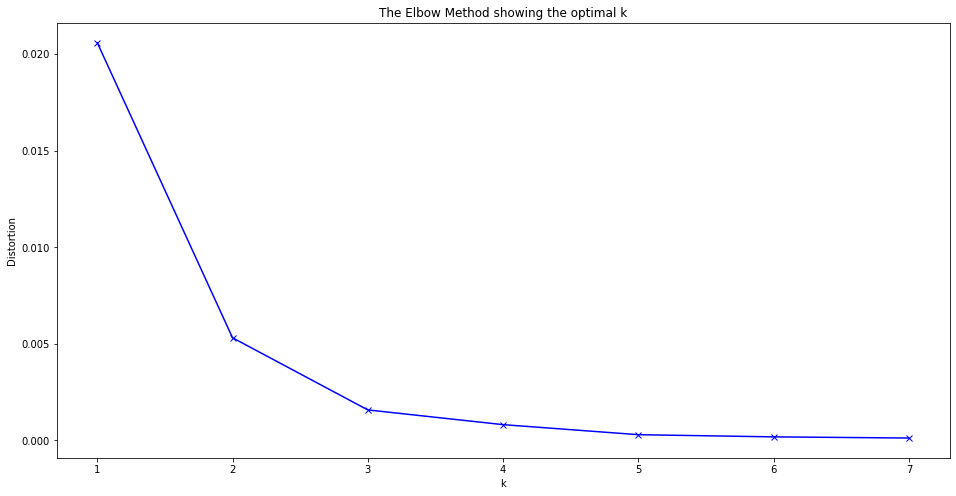

In [23]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Explanation of the choice
I choose to use the value 3 for k even though the optimal one from the algorithm would have been to be 5 or 4. This 
is due to the empirical fact that when I inspected the clusters of neighborhoods with k={4, 5}, there were classes with only one restaurant in very improbable location ( on the far West site of the city of Milan). 

In [24]:
# set number of clusters
kclusters = 3

mi_clustering = mi_cr.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 1, 2, 0, 1, 0, 0, 2], dtype=int32)

In [25]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
mi_merged = mi_cr.copy()

# add clustering labels
mi_merged["Cluster Labels"] = kmeans.labels_

In [26]:
mi_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
mi_merged.head()

,Neighborhood,Chinese Restaurant,Cluster Labels
0,Affori,0.017241,2
1,Arzaga,0.010000,2
2,Baggio,0.000000,0
3,Barona,0.052632,1
4,Bicocca,0.010000,2


In [27]:
# merge mi_merged with the dataframe conatining latitude/longitude for each neighborhood
mi_merged = mi_merged.join(df.set_index("Neighborhood"), on="Neighborhood")

print(mi_merged.shape)
mi_merged.tail() 

(96, 5)


,Neighborhood,Chinese Restaurant,Cluster Labels,Latitude,Longitude
91,Vialba,0.012821,2,45.51491,9.12815
92,Vigentino,0.010000,2,45.43372,9.20104
93,Villaggio dei Giornalisti,0.050000,1,45.49599,9.20234
94,Villapizzone,0.000000,0,45.49834,9.14453
95,Zona Tortona,0.000000,0,45.45262,9.16532


In [28]:
# sort the results by Cluster Labels
mi_merged.sort_values(["Cluster Labels"], inplace=True)
mi_merged

,Neighborhood,Chinese Restaurant,Cluster Labels,Latitude,Longitude
47,Nolo,0.000000,0,45.545800,9.389880
39,Maggiolina,0.000000,0,45.462645,8.970445
40,Monluè,0.000000,0,45.452340,9.253770
41,Montalbino,0.000000,0,45.501450,9.186840
43,Morsenchio,0.000000,0,45.442130,9.245050
44,Muggiano,0.000000,0,45.448320,9.064010
45,Musocco,0.000000,0,45.504150,9.121460
46,Niguarda,0.000000,0,45.518400,9.192010
94,Villapizzone,0.000000,0,45.498340,9.144530
50,Ponte Lambro,0.000000,0,45.442400,9.264200


In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mi_merged['Latitude'], mi_merged['Longitude'], mi_merged['Neighborhood'], mi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [30]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

## 8. Examination of the neighborhoods  <a class="anchor" id="chap8"></a>

In [41]:
mi_merged.loc[mi_merged['Cluster Labels'] == 0]

,Neighborhood,Chinese Restaurant,Cluster Labels,Latitude,Longitude
47,Nolo,0.0,0,45.545800,9.389880
39,Maggiolina,0.0,0,45.462645,8.970445
40,Monluè,0.0,0,45.452340,9.253770
41,Montalbino,0.0,0,45.501450,9.186840
43,Morsenchio,0.0,0,45.442130,9.245050
44,Muggiano,0.0,0,45.448320,9.064010
45,Musocco,0.0,0,45.504150,9.121460
46,Niguarda,0.0,0,45.518400,9.192010
94,Villapizzone,0.0,0,45.498340,9.144530
50,Ponte Lambro,0.0,0,45.442400,9.264200


In [39]:
mi_merged.loc[mi_merged['Cluster Labels'] == 1]

,Neighborhood,Chinese Restaurant,Cluster Labels,Latitude,Longitude
14,Casoretto,0.040000,1,45.488730,9.229860
38,Macconago,0.058824,1,45.413440,9.210550
3,Barona,0.052632,1,45.433710,9.151600
93,Villaggio dei Giornalisti,0.050000,1,45.495990,9.202340
32,Greco,0.050000,1,45.497020,9.212120
20,Città Studi,0.040000,1,45.477080,9.226600
22,Conca del Naviglio,0.055556,1,45.384121,9.132629
49,Ortica,0.030000,1,45.470960,9.241600
89,Turro,0.040000,1,45.494520,9.221710
6,Borgo degli Ortolani,0.034091,1,45.576439,9.061037


In [40]:
mi_merged.loc[mi_merged['Cluster Labels'] == 2]

,Neighborhood,Chinese Restaurant,Cluster Labels,Latitude,Longitude
77,Ronchetto sul Naviglio,0.013514,2,45.438090,9.128310
76,Ronchetto delle Rane,0.026316,2,45.401840,9.178820
83,Segnano,0.010000,2,45.506910,9.206050
81,San Siro,0.020000,2,45.480740,9.128230
4,Bicocca,0.010000,2,45.521490,9.213260
91,Vialba,0.012821,2,45.514910,9.128150
85,Selvanesco,0.024390,2,45.418030,9.196290
86,Taliedo,0.014706,2,45.451430,9.248460
90,Vaiano Valle,0.013514,2,45.428930,9.216200
1,Arzaga,0.010000,2,45.454670,9.136130


# Conclusions

Looking at the results of the clustering we can clearly see how the restaurants are spread across the city. The 0 labeled cluster represents the neighborhood with virtually no Chinese restaurants open. The 2 labeled clusters represents a medium concentration and 1 the highest one. More than 50% of the datas are labeled as 0. This gives us create opportunities when we want to open a new local. Moreover many of the "free" places are in an interesting position in the northern part of the city with little to no competition. Finally the we can see a higher concentration of similar restaurants in the North-East part of the city and thus should be avoided in order to have the least competition. 